# DOG 🐶 <--> CAT 🙀 

## import library

In [8]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation , Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import random 
import glob
import shutil

In [9]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU Avilibale: ", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True) 

Num GPU Avilibale:  1


In [10]:
# !unzip -q '/kaggle/input/dogs-vs-catsclassification/dogs vs cats'

In [11]:
train_path = "/kaggle/input/dogs-vs-catsclassification/dogs vs cats/train"
test_path = "//kaggle/input/dogs-vs-catsclassification/dogs vs cats/test"
valid_path = "/kaggle/input/dogs-vs-catsclassification/dogs vs cats/valid"

In [12]:
# Define the image data generators
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [13]:
assert train_batches.n == 2000
assert valid_batches.n == 300
assert test_batches.n == 150
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [15]:
image , labels = next(train_batches)

In [16]:
# this function will plot the image in 1 row and 10 columns
def plotImages(images_arr):
    fig , axes = plt.subplots(1,10,figsize=(20,20))
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

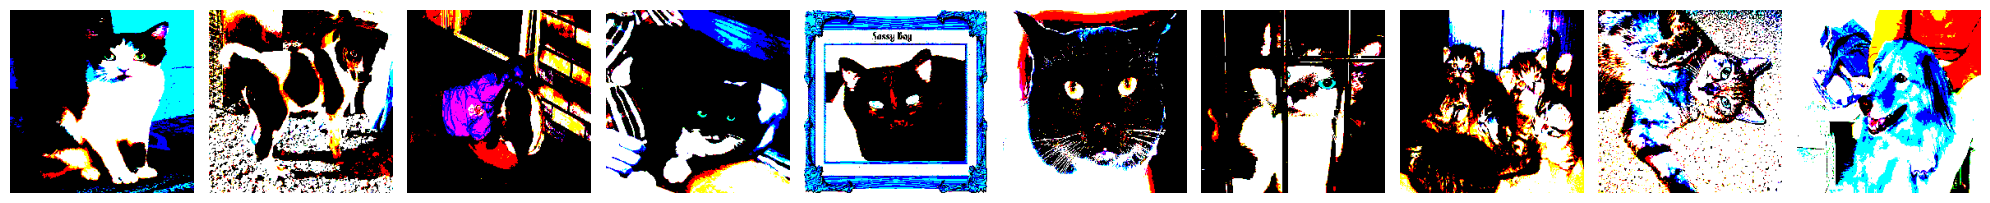

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [17]:
plotImages(image)
print(labels)

In [18]:
model = Sequential([
    Conv2D(filters = 32,kernel_size =(3,3),activation = 'relu',padding = 'same',input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides = 2),
    Conv2D(filters = 64,kernel_size =(3,3),activation = 'relu',padding = 'same'),
    MaxPooling2D(pool_size = (2,2),strides = 2),
    Flatten(),
    Dense(units=2,activation = 'softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [21]:
model.compile(optimizer=Adam(learning_rate = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [22]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 10),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='/kaggle/working/model-{epoch}.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    mode="max")]

In [23]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose = 2,callbacks=[checkpointer])

Epoch 1/20

Epoch 1: saving model to /kaggle/working/model-1.hdf5
200/200 - 30s - loss: 30.0227 - accuracy: 0.5670 - val_loss: 15.6921 - val_accuracy: 0.6700 - 30s/epoch - 152ms/step
Epoch 2/20

Epoch 2: saving model to /kaggle/working/model-2.hdf5
200/200 - 7s - loss: 10.5989 - accuracy: 0.7070 - val_loss: 23.3918 - val_accuracy: 0.5500 - 7s/epoch - 34ms/step
Epoch 3/20

Epoch 3: saving model to /kaggle/working/model-3.hdf5
200/200 - 7s - loss: 6.2194 - accuracy: 0.8050 - val_loss: 12.0914 - val_accuracy: 0.6333 - 7s/epoch - 35ms/step
Epoch 4/20

Epoch 4: saving model to /kaggle/working/model-4.hdf5
200/200 - 7s - loss: 2.9581 - accuracy: 0.8690 - val_loss: 11.7247 - val_accuracy: 0.6267 - 7s/epoch - 35ms/step
Epoch 5/20

Epoch 5: saving model to /kaggle/working/model-5.hdf5
200/200 - 7s - loss: 1.4550 - accuracy: 0.9135 - val_loss: 13.6620 - val_accuracy: 0.6433 - 7s/epoch - 36ms/step
Epoch 6/20

Epoch 6: saving model to /kaggle/working/model-6.hdf5
200/200 - 7s - loss: 1.4081 - accu

## Predict

In [24]:
test_imgs, test_labels = next(test_batches)
# plotImages(test_imgs)
print(test_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [26]:
prediction =model.predict(x=test_batches,verbose=0)

In [27]:
np.round(prediction)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [28]:
cm = confusion_matrix(y_true = test_batches.classes,y_pred = np.argmax(prediction,axis = -1))

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[25 25]
 [25 75]]


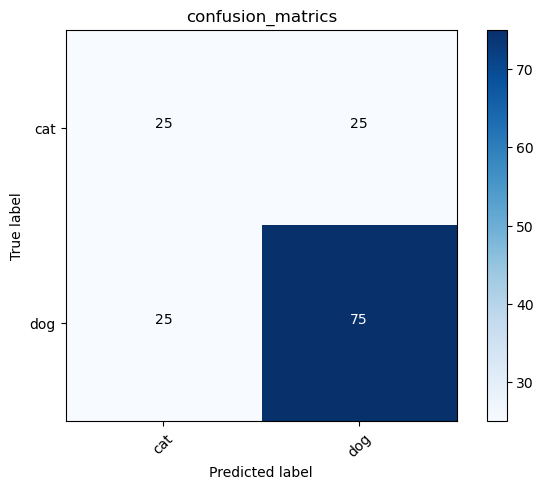

In [31]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm,classes = cm_plot_labels,title = 'confusion_matrics')
plt.show()

# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images.Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [23]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import misc, ndimage
# import keras
# from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# %matplotlib inline

In [24]:
# # plots images with labels within jupyter notebook
# def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [25]:
# gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
#        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
#        channel_shift_range=10., horizontal_flip=True)

In [26]:
image_path = '/kaggle/input/dogs-vs-catsclassification/dogs vs cats/train/dog/dog.11501.jpg'

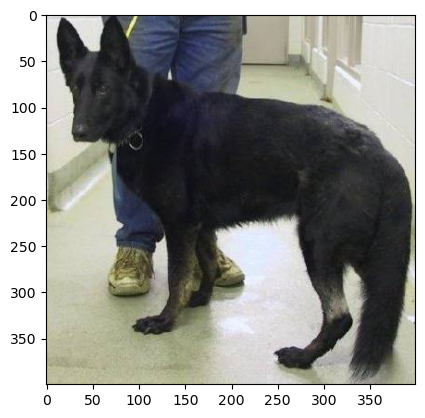

In [27]:
# # Obtain image
# # !pip install imageio
# import imageio
# image = np.expand_dims(imageio.imread(image_path),0)
# plt.imshow(image[0])

In [28]:
# Generate batches of augmented images from this image
# aug_iter = gen.flow(image)

In [29]:
# # Get 10 samples of augmented images
# aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

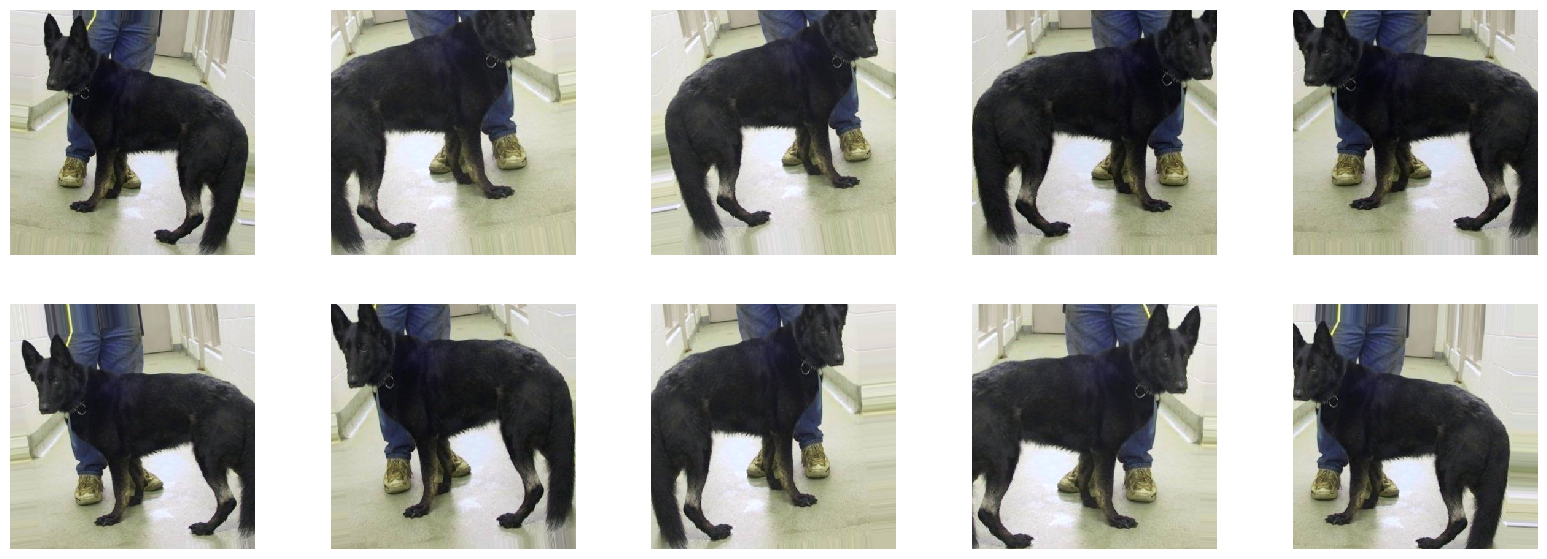

In [30]:
# # Augmented images
# plots(aug_images, figsize=(20,7), rows=2)

# Build Fine_tuned VGG16 model 

In [32]:
vgg16_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 2s 0us/step


In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
type(vgg16_model)

keras.engine.functional.Functional

In [35]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

### in this line of code we freeze the our model

In [37]:
for layer in model.layers:
    layer.trainable = False

In [38]:
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

## Train the fine_tuned vgg16 moddel

In [45]:
model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 10),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='/kaggle/working/model-{epoch}.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    mode="max")]

In [44]:
model.fit_generator(train_batches, validation_data=valid_batches, epochs=16, callbacks=[checkpointer])

Epoch 1/5
4/4 - 0s - loss: 0.8623 - accuracy: 0.4750 - val_loss: 0.8315 - val_accuracy: 0.3750 - 452ms/epoch - 113ms/step
Epoch 2/5
4/4 - 0s - loss: 0.6923 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.4000 - 376ms/epoch - 94ms/step
Epoch 3/5
4/4 - 0s - loss: 0.7445 - accuracy: 0.4750 - val_loss: 0.8429 - val_accuracy: 0.3250 - 368ms/epoch - 92ms/step
Epoch 4/5
4/4 - 0s - loss: 1.3946 - accuracy: 0.6000 - val_loss: 0.7927 - val_accuracy: 0.4000 - 358ms/epoch - 90ms/step
Epoch 5/5
4/4 - 0s - loss: 0.7194 - accuracy: 0.3250 - val_loss: 0.6800 - val_accuracy: 0.4750 - 358ms/epoch - 90ms/step


## Make Predictions with VGG16

In [47]:
predections = model.predict(x=test_batches,verbose = 0) 

In [48]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predections,axis=-1))

In [51]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[49  1]
 [96  4]]


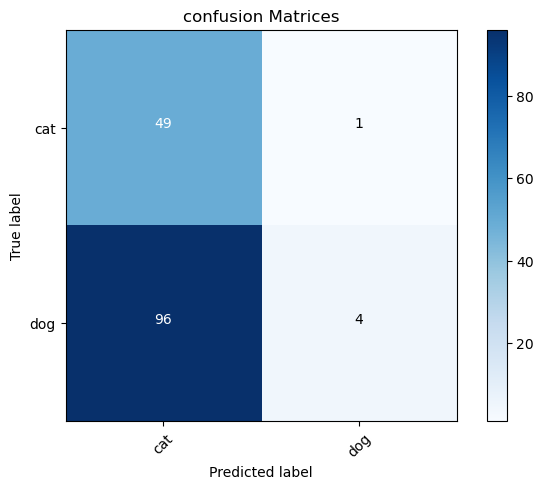

In [52]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm,classes = cm_plot_labels,title = 'confusion Matrices')